C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest - Accuracy: 0.9999, ROC-AUC: 0.9999
XGBoost - Accuracy: 0.9997, ROC-AUC: 0.9997

Model Comparison:
            Model  Accuracy   ROC-AUC
0  Random Forest  0.999877  0.999877
1        XGBoost  0.999678  0.999678


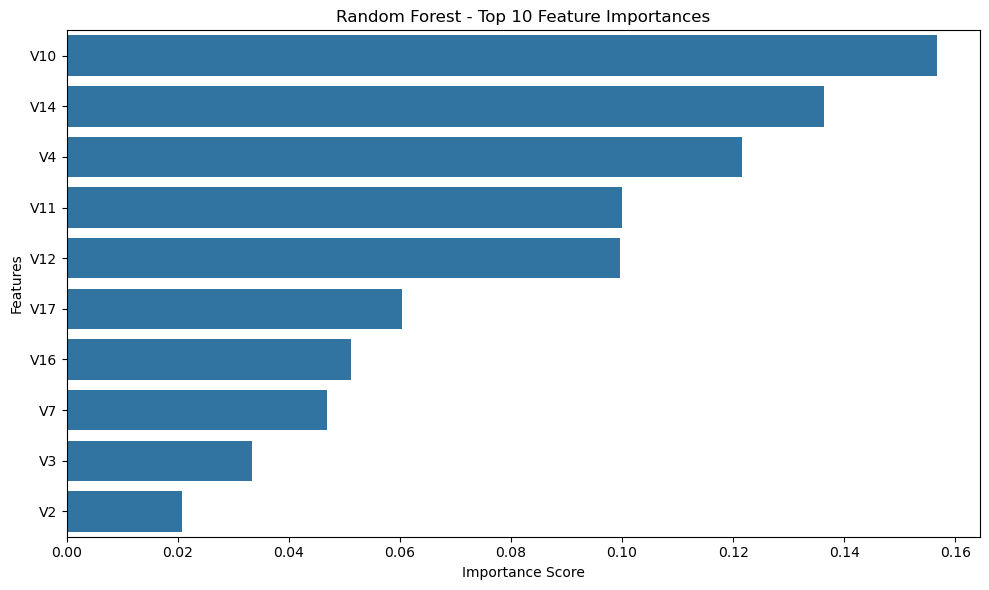

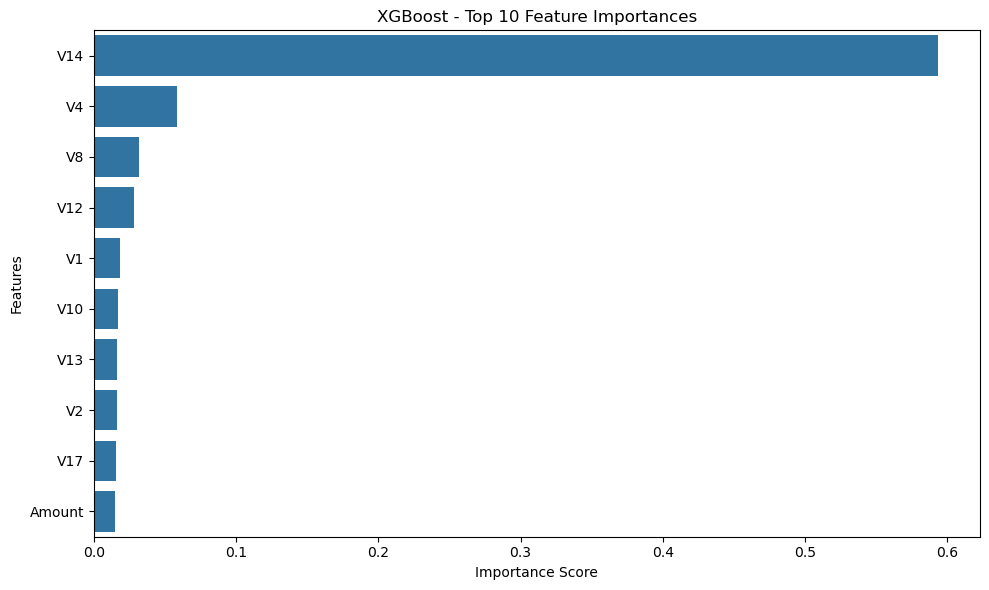

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
df = pd.read_csv("D:\\creditcard\\creditcard.csv")
df.drop('Time', axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")
    return acc, roc
rf_acc, rf_roc = evaluate_model("Random Forest", y_test, rf_preds)
xgb_acc, xgb_roc = evaluate_model("XGBoost", y_test, xgb_preds)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_acc, xgb_acc],
    'ROC-AUC': [rf_roc, xgb_roc]
})
print("\nModel Comparison:\n", comparison_df)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
def plot_feature_importance(model, model_name, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:][::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=feature_names[indices])
    plt.title(f"{model_name} - Top 10 Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest", np.array(X.columns))
plot_feature_importance(xgb, "XGBoost", np.array(X.columns))
